**Question 6: Which vaccines are the most commonly used across countries?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vacc_df = pd.read_csv('../../dataset/Vaccination-data.csv',index_col=False)

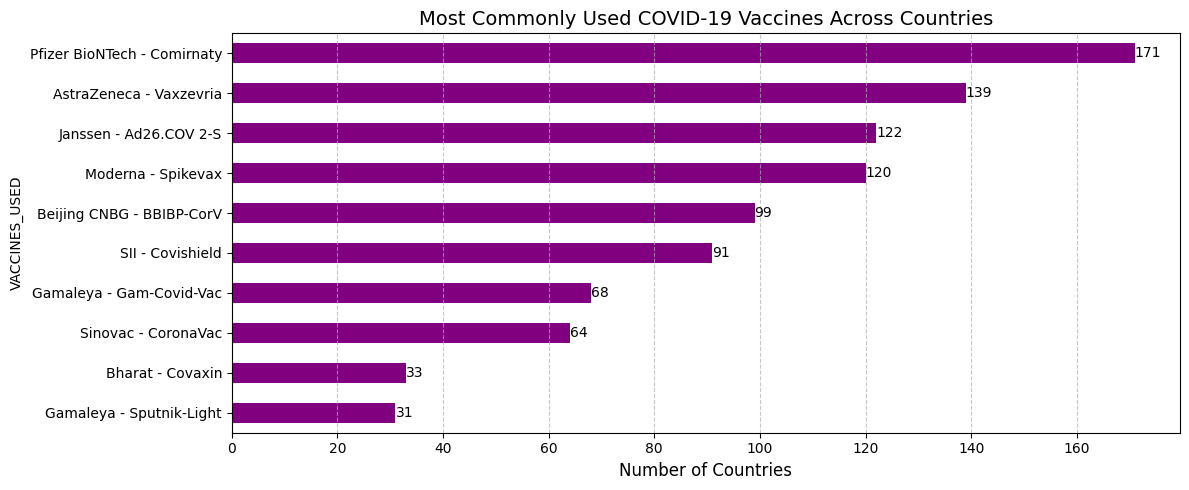

In [3]:
# Extract the top 10 most commonly used COVID-19 vaccines across countries
vaccines = (
    vacc_df['VACCINES_USED']
    .dropna()  # Remove missing values
    .str.split(',')  # Split multiple vaccines
    .explode()  # Flatten into individual rows
    .str.strip()  # Remove extra spaces
    .value_counts()  # Count occurrences
    .head(10)  # Select top 10 vaccines
)

# Initialize the figure
plt.figure(figsize=(12, 5))
bars = vaccines.plot(kind='barh', color='purple')
# Add axis label and chart title
plt.xlabel('Number of Countries', fontsize=12)
plt.title('Most Commonly Used COVID-19 Vaccines Across Countries', fontsize=14)
# Invert y-axis so the vaccine with the highest count appears at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for i, v in enumerate(vaccines):
    plt.text(v, i, str(v), va='center', ha='left', fontsize=10)

# Display the chart
plt.tight_layout()
plt.savefig('Most Commonly Used COVID-19 Vaccines Across Countries.png')
plt.show()
plt.close()

In [4]:
from wordcloud import WordCloud

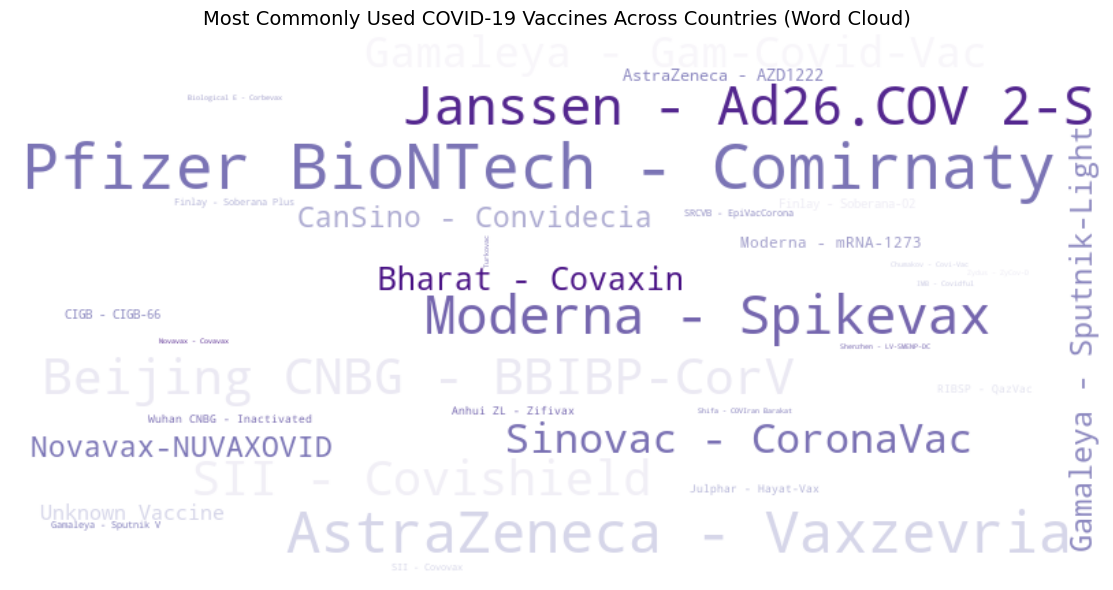

In [5]:
vaccines = vacc_df['VACCINES_USED'].dropna().str.split(',').explode().str.strip().value_counts().to_dict()

wc = WordCloud(width=800, height=400, background_color='white', colormap='Purples', contour_color='purple', contour_width=1).generate_from_frequencies(vaccines)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Commonly Used COVID-19 Vaccines Across Countries (Word Cloud)', fontsize=14)
plt.tight_layout()
plt.savefig('alt_plot6.png')
plt.show()
plt.close()